# Economic Data Analysis

In [13]:
!pip install fredapi

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import time

#preset styling
plt.style.use('fivethirtyeight')
pd.set_option("display.max_columns", 500)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

from fredapi import Fred

fred_key = '063c55cc062f89e6d19658eab79815cc'

# 1. Create the Fred Object

In [15]:
fred = Fred(api_key = fred_key)

# 2. Search for Economic Data

In [16]:
sp_search = fred.search('S&P', order_by='popularity')

In [17]:
sp_search.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2025-03-24,2025-03-24,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2025-03-21,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2025-03-24 08:37:08-05:00,92,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2025-03-24,2025-03-24,S&P CoreLogic Case-Shiller U.S. National Home ...,1987-01-01,2024-12-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2025-02-25 08:11:20-06:00,88,"For more information regarding the index, plea..."
SP500,SP500,2025-03-24,2025-03-24,S&P 500,2015-03-25,2025-03-24,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2025-03-24 19:11:45-05:00,83,The observations for the S&P 500 represent the...
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2025-03-24,2025-03-24,ICE BofA US High Yield Index Effective Yield,1996-12-31,2025-03-21,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2025-03-24 08:37:12-05:00,82,This data represents the effective yield of th...
BAMLC0A0CM,BAMLC0A0CM,2025-03-24,2025-03-24,ICE BofA US Corporate Index Option-Adjusted Sp...,1996-12-31,2025-03-21,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2025-03-24 08:45:01-05:00,78,The ICE BofA Option-Adjusted Spreads (OASs) ar...


# 3. Pull Raw Data and Plot

<Axes: title={'center': 'S&P500'}>

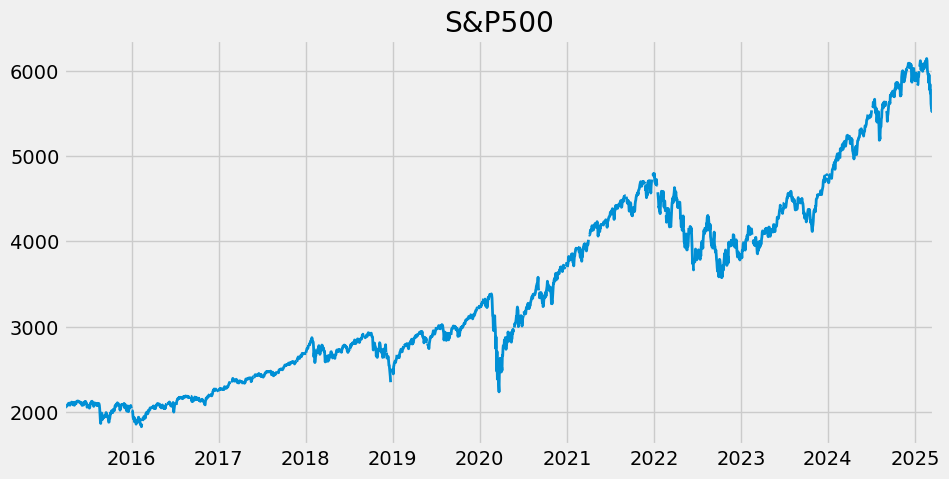

In [18]:
sp500 = fred.get_series(series_id='SP500')
sp500.plot(figsize=(10, 5), title='S&P500', lw=2)

# Pull and Join Multiple Data Series

In [19]:
# Exploring unemployment data
# unemp_results = fred.search('unemployment', order_by='popularity')
# unrate = fred.get_series('UNRATE')

In [20]:
unemp_df = fred.search('unemployment rate state', filter=('frequency', 'Monthly'))
unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')]

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2025-03-24,2025-03-24,Unemployment Rate,1948-01-01,2025-02-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-03-07 07:46:04-06:00,95,The unemployment rate represents the number of...
LNS14000006,LNS14000006,2025-03-24,2025-03-24,Unemployment Rate - Black or African American,1972-01-01,2025-02-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-03-07 07:48:10-06:00,72,The series comes from the 'Current Population ...
CAUR,CAUR,2025-03-24,2025-03-24,Unemployment Rate in California,1976-01-01,2025-01-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-03-20 15:41:08-05:00,64,None
TXUR,TXUR,2025-03-24,2025-03-24,Unemployment Rate in Texas,1976-01-01,2025-01-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-03-20 15:41:51-05:00,56,None
M0892AUSM156SNBR,M0892AUSM156SNBR,2025-03-24,2025-03-24,Unemployment Rate for United States,1929-04-01,1942-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2012-08-17 14:26:06-05:00,54,Series Is Presented Here As Three Variables--(...
LNS14000024,LNS14000024,2025-03-24,2025-03-24,Unemployment Rate - 20 Yrs. & over,1948-01-01,2025-02-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-03-07 07:48:09-06:00,56,The series comes from the 'Current Population ...
LNS14000031,LNS14000031,2025-03-24,2025-03-24,"Unemployment Rate - 20 Yrs. & over, Black or A...",1972-01-01,2025-02-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-03-07 07:48:09-06:00,56,The series comes from the 'Current Population ...
M0892BUSM156SNBR,M0892BUSM156SNBR,2025-03-24,2025-03-24,Unemployment Rate for United States,1940-01-01,1946-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2012-08-17 14:29:19-05:00,14,Series Is Presented Here As Three Variables--(...
NYUR,NYUR,2025-03-24,2025-03-24,Unemployment Rate in New York,1976-01-01,2025-01-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-03-20 15:41:42-05:00,53,None


In [23]:
all_results = []

for myid in unemp_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)
    time.sleep(0.1) # Don't request to fast and get blocked
uemp_results = pd.concat(all_results, axis=1)

In [28]:
#this loop and list will drop all concatenated columns that aren't relevant state data
#we know this because every state has a series id by format "__UR" which is 4 characters long

cols_to_drop = [] 
for i in uemp_results:
    if len(i) > 4:
        cols_to_drop.append(i)
uemp_results = uemp_results.drop(columns = cols_to_drop, axis = 1)

In [29]:
uemp_states = uemp_results.copy()
uemp_states = uemp_states.dropna()
id_to_state = unemp_df['title'].str.replace('Unemployment Rate in ', '').to_dict()
uemp_states.columns = [id_to_state[c] for c in uemp_states.columns] 

In [30]:
px.line(uemp_states)